# Minor Merger of a Spherical and Disk Galaxy with 130,000 Particles
\
This program shows the user how to set up and run a simulation between a spherical and a disk galaxy, and how to complete a preliminary analysis of the results. The simulation is of the interaction between a 10:1 merger of a larger galaxy and a smaller satellite galaxy in a violent collision event, and is a possible merger scenario recreating NGC 1316. The spherical galaxy was generated with the **generate_spherical_galaxy** script in the tests folder, and is in energetic equilibrium. The disk galaxy model was generated using the Agama package (Vasiliev, 2018), and is in quasi-equilibrium when simulated in isolation. Due to the algorithm scaling as O(N$^2$), many of the important components found in spiral galaxies such as gas, dark matter, central black hole, and bulge were omitted, which are integral in keeping the model in equilibrium.

***
Please ensure MSG_Nbody is installed via pip before running the program. 

***

In [1]:
from MSG_Nbody import *

In [2]:
disk_pos, disk_vel, disk_mass = load_initial_conditions('Initial_Conditions/disk_galaxy_N80000.txt')
sphr_pos, sphr_vel, sphr_mass = load_initial_conditions('Initial_Conditions/sphr_galaxy_N50000.txt')

In [3]:
# scale disk galaxy 
initial_mass = np.sum(disk_mass)
# divide by the total mass to normalize the satellite galaxy mass
R = 1/initial_mass
M = 1/initial_mass
disk_pos, disk_vel, disk_mass = scale_initial_positions(disk_pos, disk_vel, disk_mass, R, M)
# scale spherical galaxy
sphr_pos, sphr_vel, sphr_mass = scale_initial_positions(sphr_pos, sphr_vel, sphr_mass, 2, 10)
print(f'final satellite disk galaxy mass: {np.sum(disk_mass):.4}')
print(f'final spherical galaxy mass: {np.sum(sphr_mass):.4}')

# calculate the escape velocity of the satellite galaxy placed at x=50,y=10,z=0
P0 = [50.0, 10.0, 0.0]
escape_velocity = compute_escape_velocity(P0[0], P0[1], P0[2], np.sum(sphr_mass))
print(f'escape velocity: {escape_velocity:.3}')

# initial velocity for satellite galaxy's collision course
V0 = [-0.5, 0.0, 0.0]
print('magnitude of satellite galaxy trajectory velocity: ', np.sqrt(V0[0]**2 + V0[1]**2 + V0[2]**2))
# move satellite galaxy to its initial position
disk_pos += P0
# give the satellite galaxy a velocity in the negative x direction less than the escape velocity to put it on a collision path
# the velocity is negative because, from the satellite galaxy, the host galaxy is in the negative x direction
disk_vel += V0

pos_list = [sphr_pos, disk_pos]
vel_list = [sphr_vel, disk_vel]
mass_list = [sphr_mass, disk_mass]
positions, velocities, masses = concatenate_initial_conditions(pos_list, vel_list, mass_list)

final satellite disk galaxy mass: 1.0
final spherical galaxy mass: 10.0
escape velocity: 0.626
magnitude of satellite galaxy trajectory velocity:  0.5
positions shape: (130000, 3), velocities shape: (130000, 3), masses shape: (130000, 1) total simulation mass: 11.0


100%|██████████████████████████████████████| 5000/5000 [00:23<00:00, 210.59it/s]


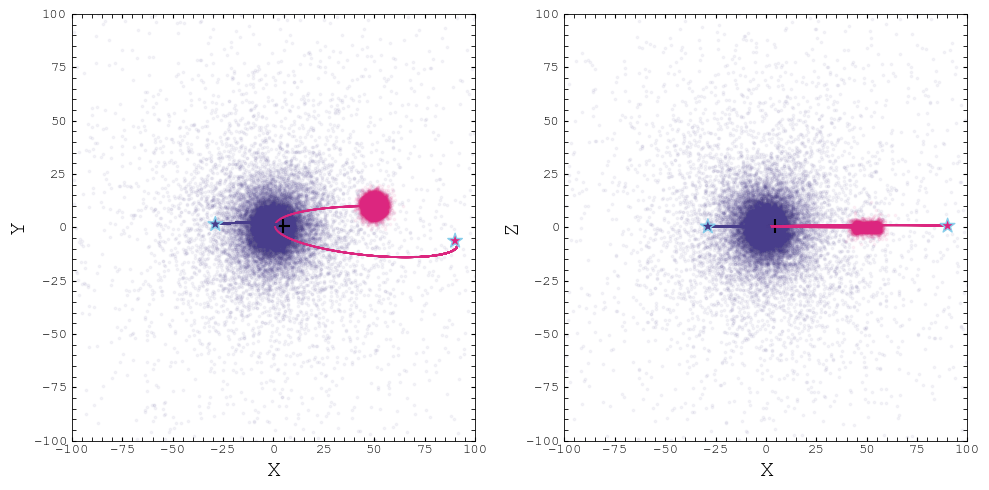

In [4]:
init_vels = [[0,0,0],V0]
plot_orbital_trajectory(pos_list, init_vels, mass_list, 0.1, 5000, plot_glxys=True)

In [ ]:
# run N-body simulation
MSG_Nbody(positions, velocities, masses, 0.1, 7000, snapshot_save_rate=10)

simulation running....  /ᐠ –ꞈ –ᐟ\<[pls be patient]


 27%|████████▊                        | 1880/7000 [35:05:50<81:40:53, 57.43s/it]

### Load Simulation Outputs

In [2]:
pos, vel, potential = load_simulation_outputs('simulation_outputs_N130000/*',[50000,80000])

100%|████████████████████████████████████████| 319/319 [00:02<00:00, 149.50it/s]


### Shift to Center of Mass Frame of Spherical Galaxy

In [3]:
masses = np.load('masses_N130000.npy')
M1 = masses[:50000,:]
M2 = masses[50000:,:]
pos, vel = shift_2_com_frame(pos, vel, M1, galaxy_idx=0)

shifting frame of reference: 100%|███████████| 319/319 [00:01<00:00, 256.73it/s]


### Hexbin Panel Plot
By default, **plot_hexpanel** plots a 3x3 grid of 9 equally spaced timesteps between the first and last timesteps. This can be changed with the **timesteps** and **nrows_ncols** parameters.

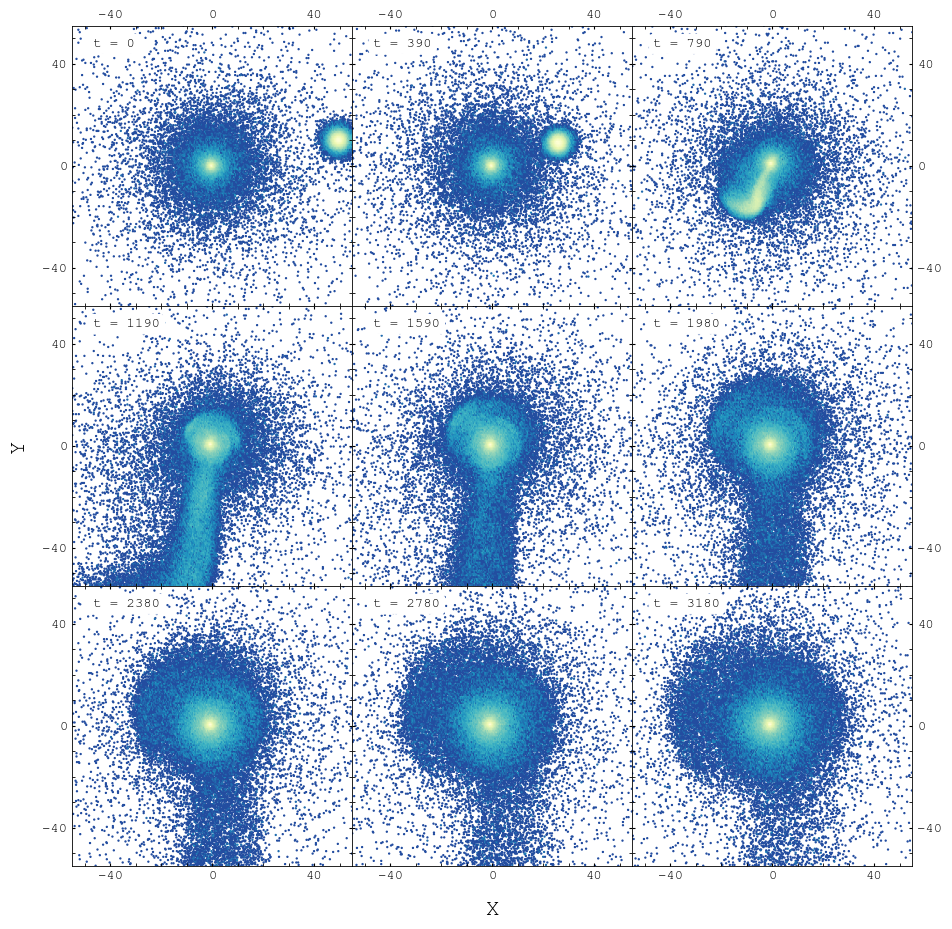

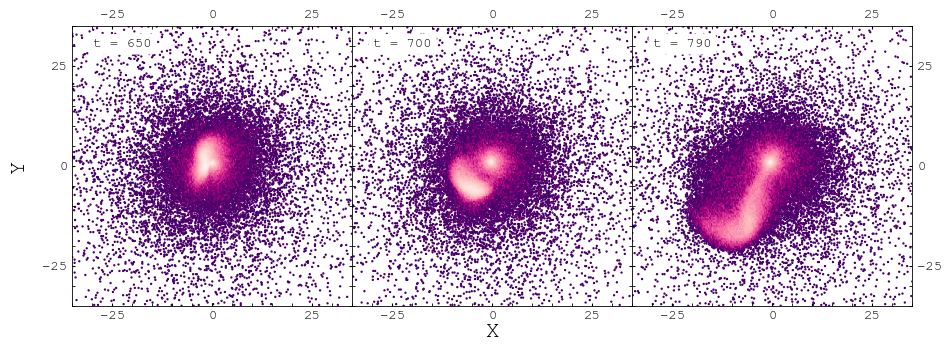

In [5]:
# default hexpanel plot of XY projection
axes = [0,1]
gridsize = 300
plot_hexpanel(pos, axes, gridsize, scale=55)

# 1x3 hexpanel plot of XY projection
timesteps = [65, 70, 79]
nrows_ncols = [1,3]
plot_hexpanel(pos, axes, gridsize, timesteps, nrows_ncols, scale=35, user_cmaps=['RdPu_r'])

### Panel Plot

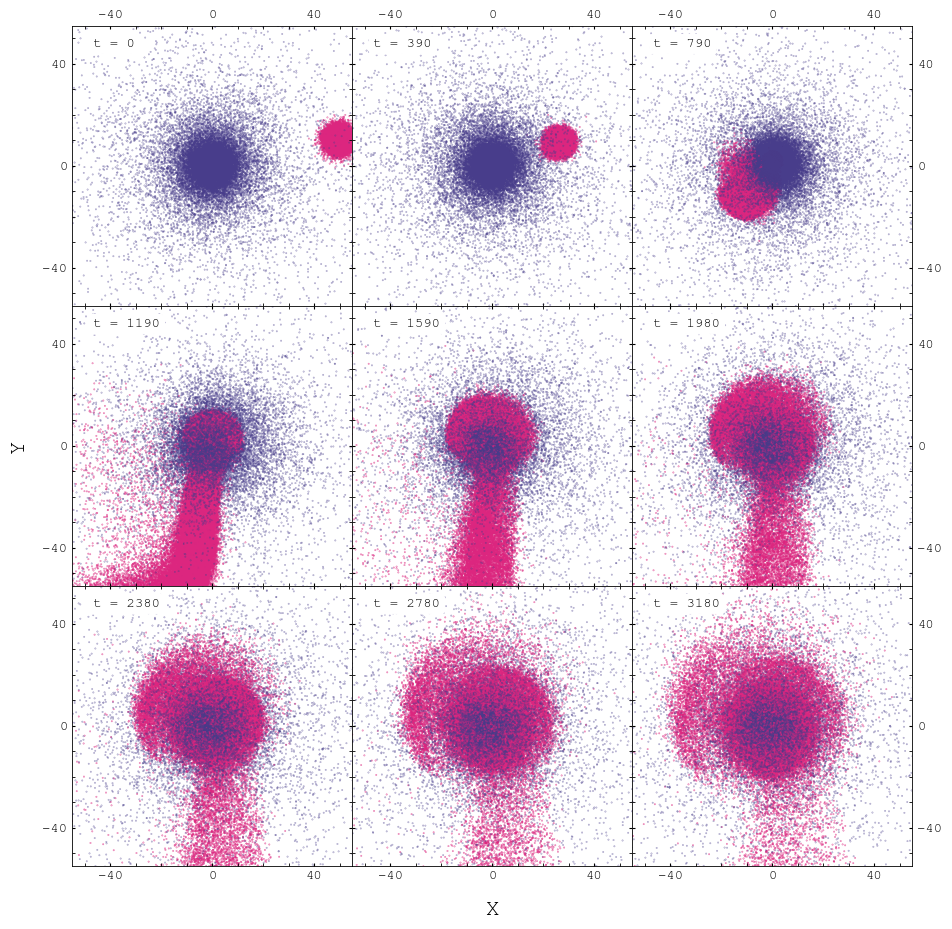

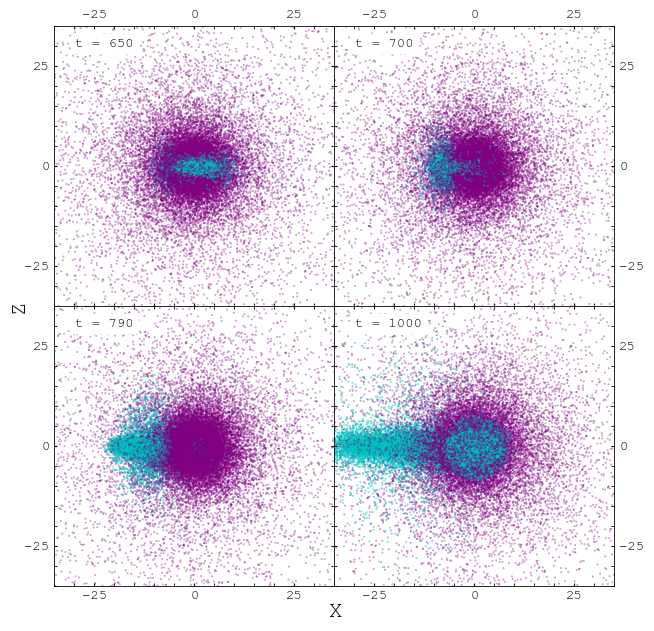

In [36]:
# default panel plot
axes = [0,1]
plot_panel(pos, axes, scale=55)

# 2x2 panel plot of XZ projection
axes = [0,2]
timesteps = [65, 70, 79, 100]
nrows_ncols = [2,2]
plot_panel(pos, axes, timesteps, nrows_ncols, scale=35, user_colors=['purple', 'c'])

### Position-Velocity Diagrams
The positions are projected on a plane orthagonal to the line of sight vector chosen, and a thin cross sectional slice is taken. The major axis positions (along the 'x' axis of the projection) are then plotted against the line of sight component of the velocities.

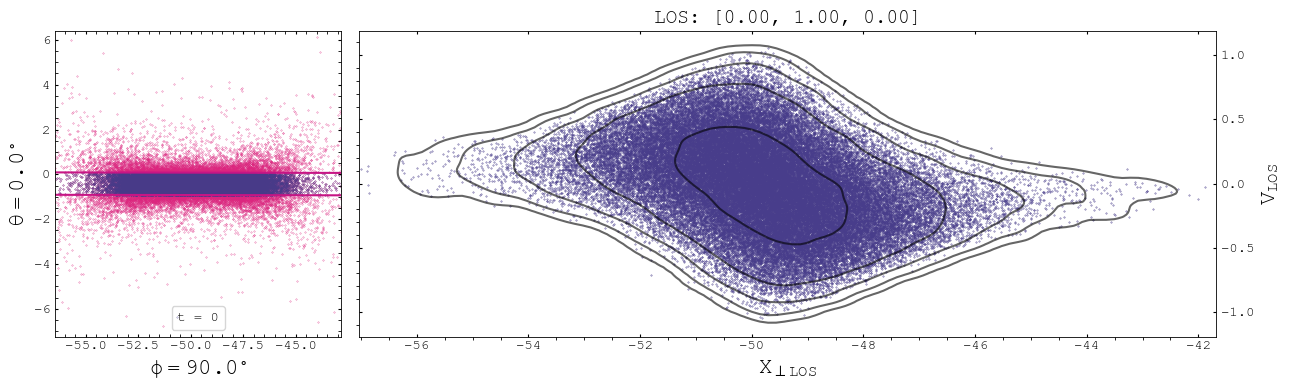

In [11]:
t = 0
los_vector = [0,1,0]
width = 0.5

# PVD along the y axis (edge on view)
# notice how the phase space is assymetrical due to the disk rotation
# (half the disk is coming towards us (blue shifted), while the other half away (redshifted)
plot_PVD(pos[1], vel[1], t, los_vector, width)

The cross sectional slice is automatically chosen by fitting a linear polynomial $y=mx+b$ to the projection of the data. We can shift the line using **m_shift** and **b_shift**: $y=m*m_{shift} + b + b_{shift}$


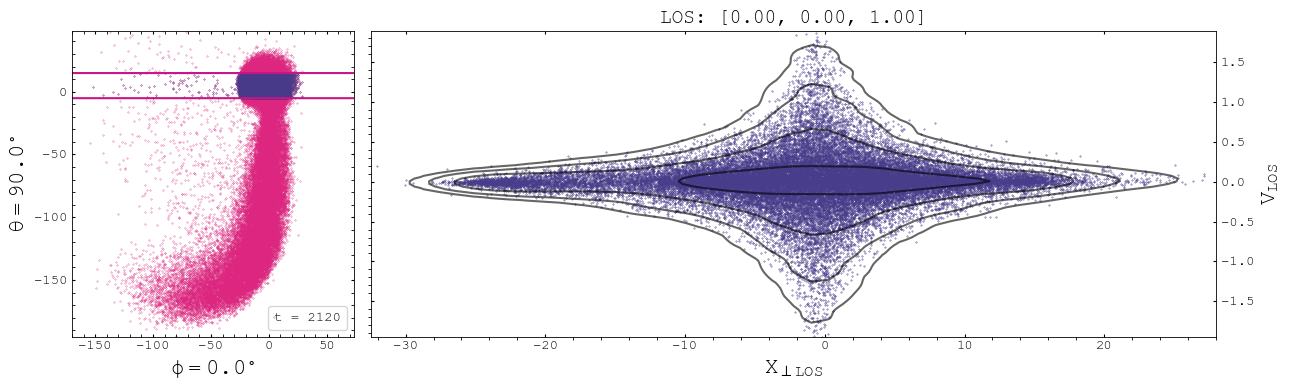

In [12]:
t = 212
los_vector = [0,0,1]
width = 10

# horizontal slice of the core by setting slope m = 0, and shifting the slice upwards
plot_PVD(pos[1], vel[1], t, los_vector, width, m_shift=0, b_shift=30)

If the cross sectional slice becomes near vertical, the axis chosen for the major axis positions needs to be transposed.

Incorrect Major Axis Chosen:


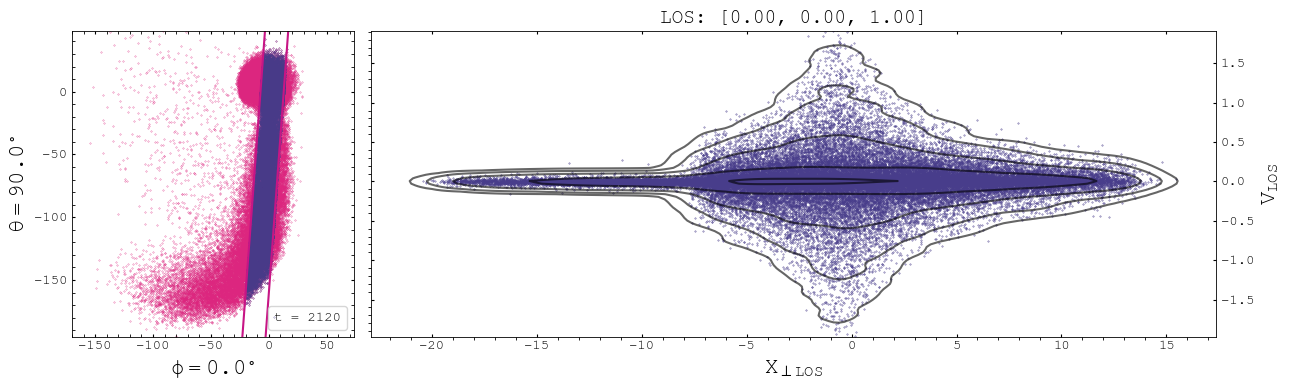

Correct Major Axis Chosen:


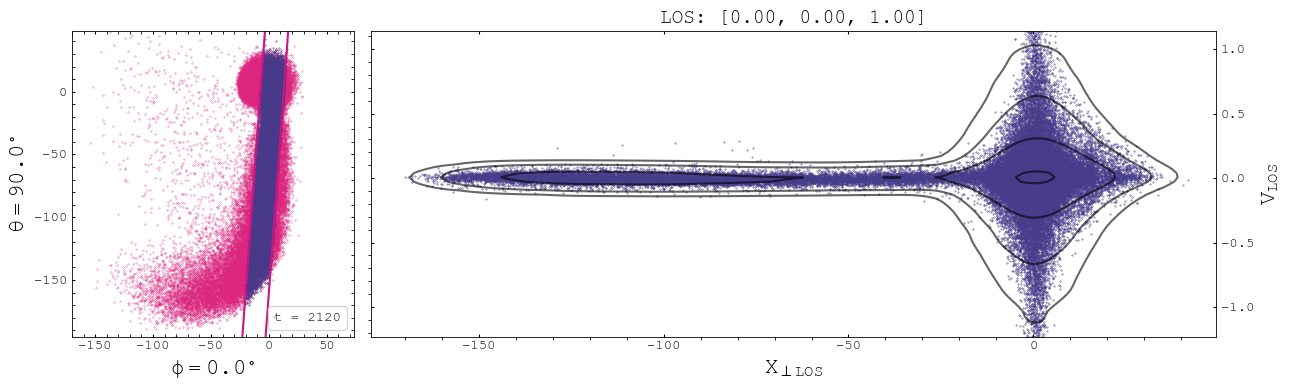

In [18]:
# vertical slice by multiplying slope of slice by 7

print('Incorrect Major Axis Chosen:')
plot_PVD(pos[1], vel[1], t, los_vector, width, m_shift=7, b_shift=-10)

print('Correct Major Axis Chosen:')
plot_PVD(pos[1], vel[1], t, los_vector, width, m_shift=7, b_shift=-10, transpose=True)

### Energy Distributions

Hernquist Galaxy Params:


mass of galaxy M:  10
scale length of galaxy a:  2
number of particles N:  50000


calculating g(E): 100%|███████████████████| 4999/4999 [00:01<00:00, 4756.48it/s]


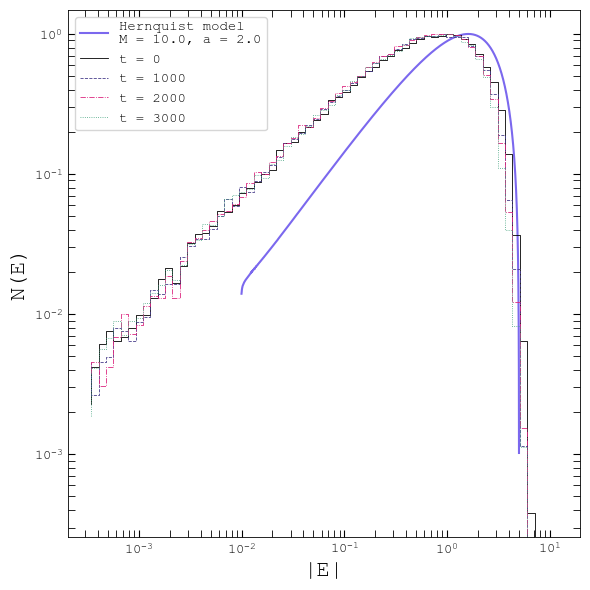

In [6]:
# energies = compute_relative_energy(vel, potential)

t = [0, 100, 200, 300]
# spherical galaxy
plot_Ne(energies[0], t, bin_min=-3.5, bin_max=1.1, plot_hernquist=True, abs_val=True)

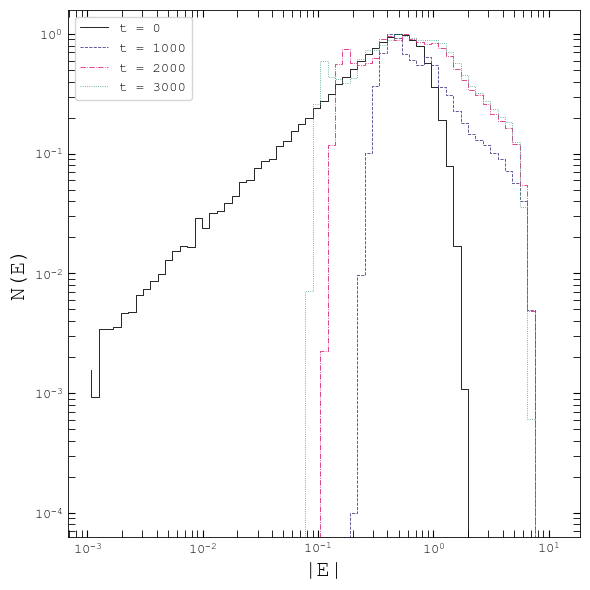

In [5]:
energies = compute_relative_energy(vel, potential)

# disk galaxy
plot_Ne(energies[1], t, bin_max=1.1, abs_val=True)

### 3D Plots

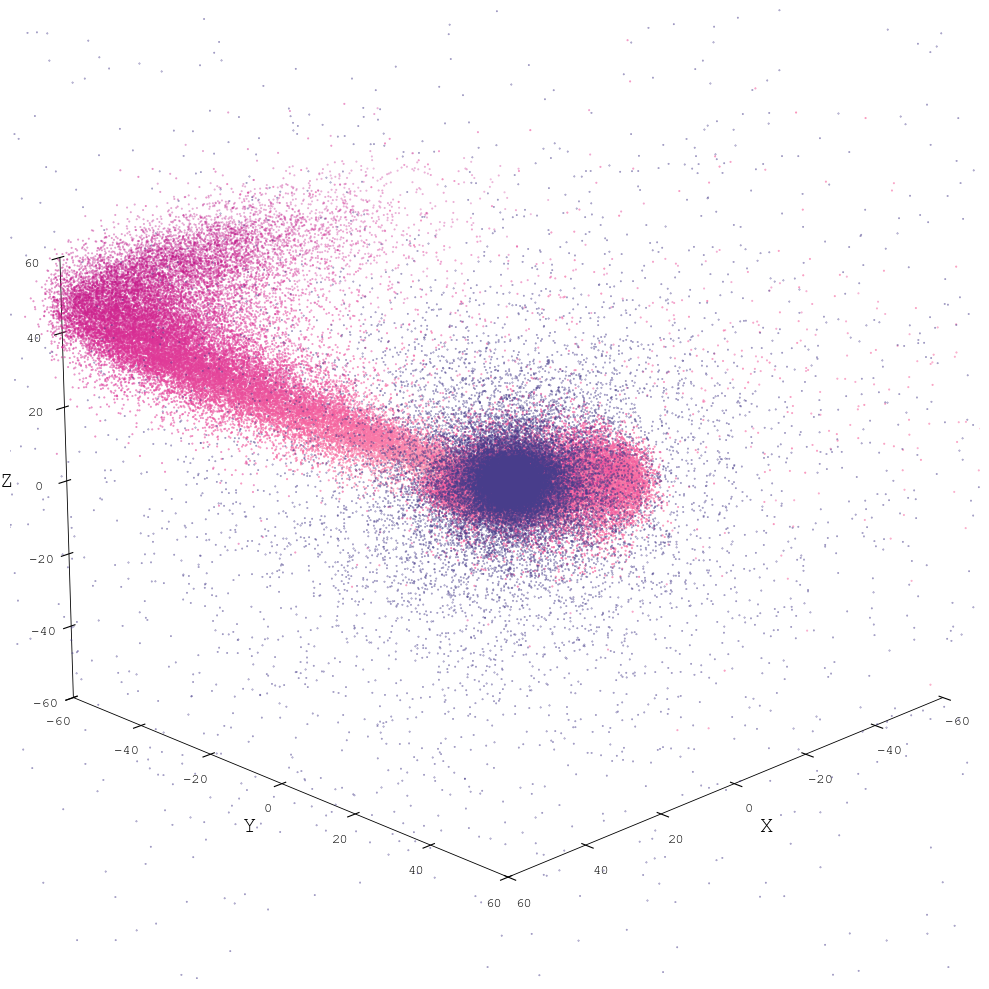

In [64]:
t = 202
vy_disk = vel[1][t,:,1]
cmap_dict = {1:vy_disk}
plot_3D(pos, t, elev=20, azim=45, cmap_dict=cmap_dict, user_cmaps=['RdPu_r'])

### 2D Plots

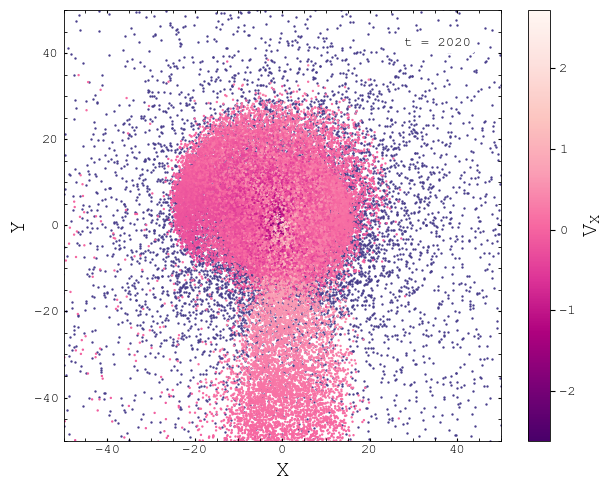

In [65]:
plot_2D(pos, t, [0,1], cmap_dict=cmap_dict, user_cmaps=['RdPu_r'])

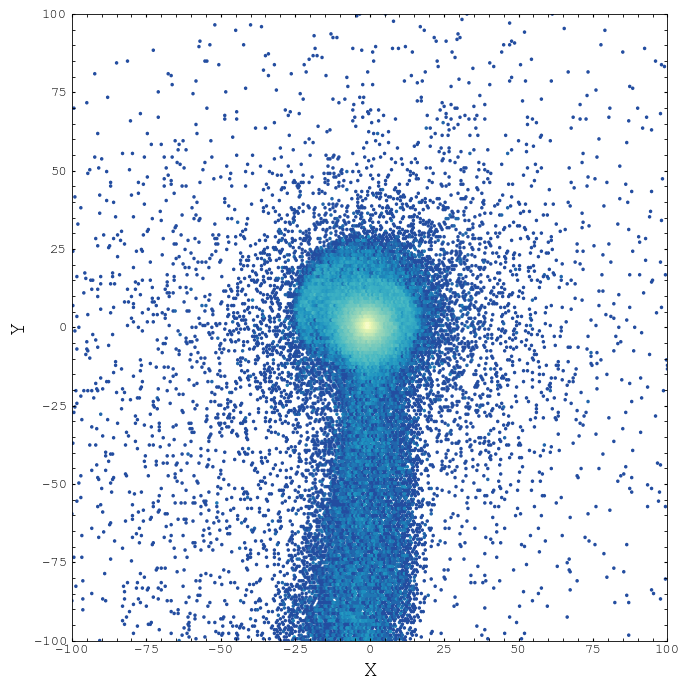

In [67]:
plot_hexbin(pos, t, [0,1], 300)